In [63]:
import pandas as pd
import csv
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [64]:
#this is 1.1 for the memory sample 
memory_df = pd.read_csv("/Users/Joey_Chan/hw1_immunogenetics/memory.csv", sep="\t")
#print(memory_df)
print(memory_df['v_identity'])

0       96.284
1       95.548
2       90.847
3       90.698
4       96.207
         ...  
1227       NaN
1228       NaN
1229       NaN
1230       NaN
1231       NaN
Name: v_identity, Length: 1232, dtype: float64


In [99]:
filtered_memory = memory_df[['v_call', 'j_call', 'cdr3', 'v_identity', 'productive']].copy()
filtered_memory = filtered_memory.dropna()
print(filtered_memory)

                       v_call    j_call  \
0       IGHV1-2*02,IGHV1-2*07  IGHJ4*02   
1    IGHV3-23*01,IGHV3-23D*01  IGHJ1*01   
2                 IGHV4-39*07  IGHJ4*02   
3                  IGHV1-2*04  IGHJ4*02   
4                 IGHV5-51*01  IGHJ4*02   
..                        ...       ...   
995               IGHV3-21*06  IGHJ4*02   
996               IGHV4-59*01  IGHJ4*02   
997              IGHV3-64D*09  IGHJ4*02   
998                IGHV1-2*02  IGHJ6*02   
999  IGHV3-23*01,IGHV3-23D*01  IGHJ6*02   

                                                  cdr3  v_identity productive  
0                 GCGAGAGATCTTGCTAACATAGTGTCTGTTGACTAC      96.284          T  
1              GCGAGTCTTAAATTAGTATGGTTGGGGGAGTTATTAGCC      95.548          T  
2                          GCGAAATATGGCAGTTCGCCCGCGGAC      90.847          T  
3           GCGAGAGGGGGGAGCAGCAACTGGTACGAGGCCTTTGACTTC      90.698          F  
4           GCCATTACGGCTGAGTATAGCAGTGCCTACTTCTTTGACAAG      96.207          T  
.. 

In [100]:
memory_problem1 = pd.DataFrame()
#we are taking our filtered dataframe and now creating another data frame that contains the v gene and j genes used. We are splitting the gene name from the allele name because two different alleles can still mean the same gene
memory_problem1['V gene used'] = filtered_memory['v_call'].map(lambda gene: gene.split('*')[0])
memory_problem1['J gene used'] = filtered_memory['j_call'].map(lambda gene: gene.split('*')[0])
memory_problem1['cdr3_used'] = filtered_memory['cdr3']
memory_problem1['SHM_calc'] = filtered_memory['v_identity'].map(lambda x:100-x)
memory_problem1['V_length'] = filtered_memory['v_identity'].map(lambda x:100-x)
memory_problem1['productive'] = filtered_memory['productive']
#create a new collumn that represents value (1 occurance per combo)
#it should be the same length as the v and j gene collums (they are the same length)
memory_problem1['Value'] = np.ones(len(memory_problem1['J gene used']))

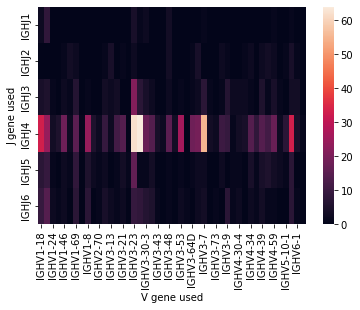

In [67]:
#generating our heatmap

#make our data into table format for heatmap function
memory_heatmap_data = pd.pivot_table(memory_problem1, index = 'J gene used', columns = 'V gene used', values= 'Value', aggfunc= np.sum)
#handling the na values as 0
memory_heatmap_data = memory_heatmap_data.fillna(0)
memory_heatmap = sns.heatmap(memory_heatmap_data)

In [68]:
#this is 1.1 for the naive sample 
naive_df = pd.read_csv("/Users/Joey_Chan/hw1_immunogenetics/naive.csv", sep="\t")
print(naive_df)

                                  sequence_id  \
0     0_merged_read_SRR3620035.1_1_length=301   
1     1_merged_read_SRR3620035.2_2_length=301   
2     2_merged_read_SRR3620035.3_3_length=301   
3     3_merged_read_SRR3620035.4_4_length=301   
4     4_merged_read_SRR3620035.5_5_length=301   
...                                       ...   
1209                                       96   
1210                                       97   
1211                                       98   
1212                                       99   
1213                                      100   

                                               sequence locus stop_codon  \
0     GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTACAGCCAGGGC...   IGH          F   
1     CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...   IGH          F   
2     CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...   IGH          F   
3     CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...   IGH          F   
4     CAGGTCACCTTGAAGGAGTCTGGTC

In [69]:
filtered_naive = naive_df[['v_call', 'j_call']].copy()
filtered_naive = filtered_naive.dropna()
print(filtered_naive)

                      v_call             j_call
0                IGHV3-49*03           IGHJ4*02
1                IGHV3-33*08           IGHJ6*02
2                IGHV4-59*01           IGHJ6*02
3                 IGHV4-4*02           IGHJ2*01
4                IGHV2-26*01           IGHJ2*01
..                       ...                ...
995  IGHV3-66*01,IGHV3-66*04           IGHJ6*02
996              IGHV4-59*01           IGHJ4*02
997              IGHV1-58*02  IGHJ4*02,IGHJ5*02
998              IGHV4-59*01           IGHJ4*02
999               IGHV1-3*01           IGHJ6*02

[1000 rows x 2 columns]


In [70]:
naive_problem1 = pd.DataFrame()
#we are taking our filtered dataframe and now creating another data frame that contains the v gene and j genes used. We are splitting the gene name from the allele name because two different alleles can still mean the same gene
naive_problem1['V gene used'] = filtered_naive['v_call'].map(lambda gene: gene.split('*')[0])
naive_problem1['J gene used'] = filtered_naive['j_call'].map(lambda gene: gene.split('*')[0])
#create a new collumn that represents value (1 occurance per combo)
#it should be the same length as the v and j gene collums (they are the same length)
naive_problem1['Value'] = np.ones(len(naive_problem1['J gene used']))

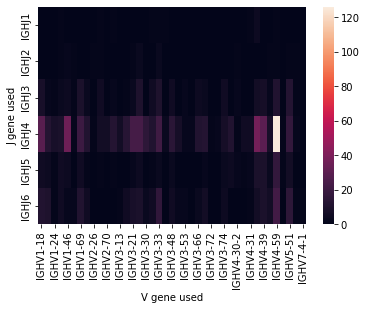

In [71]:
#generating our heatmap

#make our data into table format for heatmap function
naive_heatmap_data = pd.pivot_table(naive_problem1, index = 'J gene used', columns = 'V gene used', values= 'Value', aggfunc= np.sum)
#handling the na values as 0
naive_heatmap_data = naive_heatmap_data.fillna(0)
naive_heatmap = sns.heatmap(naive_heatmap_data)

In [72]:
#this is 1.1 for the plasma sample 
plasma_df = pd.read_csv("/Users/Joey_Chan/hw1_immunogenetics/plasma.csv", sep="\t")
print(plasma_df)

                                  sequence_id  \
0     0_merged_read_SRR3620074.1_1_length=301   
1     2_merged_read_SRR3620074.3_3_length=301   
2     3_merged_read_SRR3620074.4_4_length=301   
3     5_merged_read_SRR3620074.6_6_length=301   
4     6_merged_read_SRR3620074.7_7_length=301   
...                                       ...   
1227                                       96   
1228                                       97   
1229                                       98   
1230                                       99   
1231                                      100   

                                               sequence locus stop_codon  \
0     GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...   IGH          F   
1     GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...   IGH          F   
2     CAGGTCACCTTGAAGGAGTCTGGTCCTACGCTGGTGAAACCCAAAG...   IGH          F   
3     GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...   IGH          F   
4     CAGGTGCAGCTACAGCAGTGGGGCG

In [73]:
filtered_plasma = plasma_df[['v_call', 'j_call']].copy()
filtered_plasma = filtered_plasma.dropna()
print(filtered_plasma)

          v_call    j_call
0     IGHV3-7*01  IGHJ5*02
1     IGHV3-7*01  IGHJ5*02
2    IGHV2-26*01  IGHJ4*02
3     IGHV3-7*01  IGHJ5*02
4    IGHV4-34*01  IGHJ4*02
..           ...       ...
995   IGHV3-7*01  IGHJ5*02
996  IGHV3-21*01  IGHJ4*02
997   IGHV3-7*01  IGHJ5*02
998  IGHV2-26*01  IGHJ4*02
999   IGHV3-7*01  IGHJ5*02

[1000 rows x 2 columns]


In [74]:
plasma_problem1 = pd.DataFrame()
#we are taking our filtered dataframe and now creating another data frame that contains the v gene and j genes used. We are splitting the gene name from the allele name because two different alleles can still mean the same gene
plasma_problem1['V gene used'] = filtered_plasma['v_call'].map(lambda gene: gene.split('*')[0])
plasma_problem1['J gene used'] = filtered_plasma['j_call'].map(lambda gene: gene.split('*')[0])
#create a new collumn that represents value (1 occurance per combo)
#it should be the same length as the v and j gene collums (they are the same length)
plasma_problem1['Value'] = np.ones(len(plasma_problem1['J gene used']))

V gene used  IGHV1-2  IGHV1-24  IGHV1-69  IGHV2-26  IGHV3-11  IGHV3-15  \
J gene used                                                              
IGHJ1            NaN       NaN       NaN       NaN       NaN       NaN   
IGHJ3            2.0       NaN       NaN       NaN       NaN       NaN   
IGHJ4            5.0       NaN      11.0      85.0       NaN       1.0   
IGHJ5            NaN       3.0       NaN       NaN       NaN       NaN   
IGHJ6           12.0       NaN       NaN       NaN       1.0       NaN   

V gene used  IGHV3-21  IGHV3-23  IGHV3-30  IGHV3-33  IGHV3-48  IGHV3-7  \
J gene used                                                              
IGHJ1             NaN       NaN       NaN       NaN       NaN      NaN   
IGHJ3             NaN       NaN       NaN       NaN       NaN      NaN   
IGHJ4            24.0       2.0       1.0       NaN       1.0      5.0   
IGHJ5             6.0       NaN      17.0       NaN       2.0    745.0   
IGHJ6             1.0       NaN      

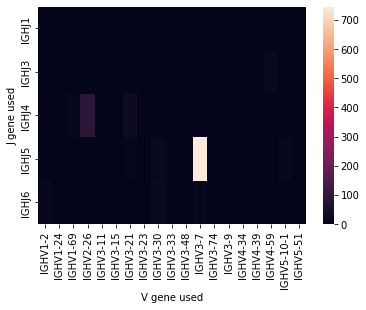

In [75]:
#generating our heatmap

#make our data into table format for heatmap function
plasma_heatmap_data = pd.pivot_table(plasma_problem1, index = 'J gene used', columns = 'V gene used', values= 'Value', aggfunc= np.sum)
print(plasma_heatmap_data)
#handling the na values as 0
plasma_heatmap_data = plasma_heatmap_data.fillna(0)
plasma_heatmap = sns.heatmap(plasma_heatmap_data)

In [83]:
# problem 1.2
V_genes_used = memory_problem1['V gene used'].value_counts().sort_values(ascending=False)
#print(V_genes_used)

#print("Top Ten V genes used in Memory Cell Dataset: ")

#print(top_ten_V_genes_used)
top_ten_V_genes_array = ["IGHV3-23", "IGHV3-30", "IGHV3-7", "IGHV1-2", "IGHV1-18", "IGHV5-51", "IGHV1-69", "IGHV1-8", "IGHV3-30-3", "IGHV3-53"]

top_ten_V_genes_used = V_genes_used[:10]
for x in top_ten_V_genes_array: 
    print(memory_problem1[memory_problem1['V gene used'] == x])


    V gene used J gene used                                         cdr3_used  \
1      IGHV3-23       IGHJ1           GCGAGTCTTAAATTAGTATGGTTGGGGGAGTTATTAGCC   
18     IGHV3-23       IGHJ5              GCGACCCGCGGTCATAGTATTGGCTGGTTCGCCGAC   
25     IGHV3-23       IGHJ3              GCGAAAACCCCTACTAATTGGGGTGCTTTTGATATC   
34     IGHV3-23       IGHJ4           GCGAAAGGGTGTGGTGGTAGCTGCTACTGGGAAGCCTAC   
62     IGHV3-23       IGHJ3  GCGAAAGATTTGCGCTATTCTCGTGGCTGGGGAGGTGCTTTTGACATC   
..          ...         ...                                               ...   
947    IGHV3-23       IGHJ3  GCGAAAGATGTGCGATATACTACTGGCTGGGGAGGTGCTCTTGACATC   
955    IGHV3-23       IGHJ4                 GCGAAAGGCGCTTGGGTGTATGCTATGAGCTAC   
977    IGHV3-23       IGHJ3           GCGAGAGACCCGGTGGGCGTTGGGCCCGCCTTTGATGTC   
983    IGHV3-23       IGHJ4                       GCGACCCAATTATGGAATACAGAATTC   
999    IGHV3-23       IGHJ6        GCGAAAGGAGTGAGTAGGATTCGCCACTACGGTTTGGACGCC   

     SHM_rate  Value  
1   

In [87]:
SHM_rate_df = memory_problem1[['V gene used', 'SHM_rate']]
SHM_rate_df = SHM_rate_df.loc[SHM_rate_df['V gene used'].isin(["IGHV3-23", "IGHV3-30", "IGHV3-7", "IGHV1-2", "IGHV1-18", "IGHV5-51", "IGHV1-69", "IGHV1-8", "IGHV3-30-3", "IGHV3-53"])]
print(SHM_rate_df)

    V gene used  SHM_rate
0       IGHV1-2     3.716
1      IGHV3-23     4.452
3       IGHV1-2     9.302
4      IGHV5-51     3.793
6       IGHV3-7     0.345
..          ...       ...
990     IGHV3-7     1.375
992     IGHV1-8     3.378
993    IGHV5-51     9.247
998     IGHV1-2     7.432
999    IGHV3-23     5.763

[568 rows x 2 columns]


<AxesSubplot: xlabel='SHM_rate', ylabel='V gene used'>

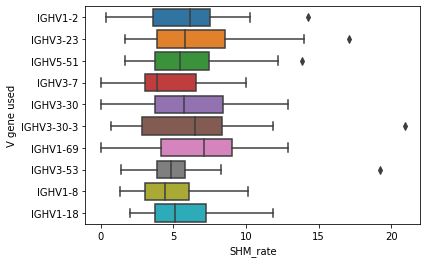

In [88]:
sns.boxplot(data = SHM_rate_df, x = "SHM_rate", y = 'V gene used')

/var/folders/_f/tvw03fpn63n5k242rz18vsvm0000gn/T/ipykernel_7859/3786252745.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdr3_df['cdr3_length'] = cdr3_df['cdr3_used'].map(lambda x:len(x))


<AxesSubplot: xlabel='cdr3_length', ylabel='V gene used'>

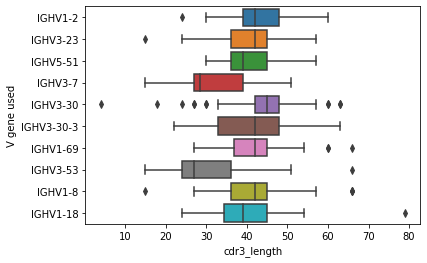

In [97]:
# problem 1.3

cdr3_df = memory_problem1[['V gene used', 'cdr3_used']]
cdr3_df['cdr3_length'] = cdr3_df['cdr3_used'].map(lambda x:len(x))
cdr3_df = cdr3_df.loc[cdr3_df['V gene used'].isin(["IGHV3-23", "IGHV3-30", "IGHV3-7", "IGHV1-2", "IGHV1-18", "IGHV5-51", "IGHV1-69", "IGHV1-8", "IGHV3-30-3", "IGHV3-53"])]
sns.boxplot(data = cdr3_df, x = "cdr3_length", y = 'V gene used')


In [110]:
#1.4 memory data
productive_memory = pd.DataFrame
productive_memory = memory_problem1[['V gene used', 'productive']]
#productive_memory = productive_memory.loc[productive_memory['V gene used'].isin(["IGHV3-23", "IGHV3-30", "IGHV3-7", "IGHV1-2", "IGHV1-18", "IGHV5-51", "IGHV1-69", "IGHV1-8", "IGHV3-30-3", "IGHV3-53"])]
count = productive_memory.productive.value_counts() 
fraction_nonproductive = count[1]/(count[0] + count[1])
print("the fraction of nonproductive sequences in the sample is: " + str(fraction_nonproductive))

the fraction of nonproductive sequences in the sample is: 0.079
